In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv', sep = ';')
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16663,35,technician,single,tertiary,no,4,yes,no,cellular,24,jul,155,1,-1,0,unknown,no
14118,35,services,single,primary,no,167,no,yes,cellular,11,jul,614,2,-1,0,unknown,yes
1927,37,blue-collar,single,secondary,no,223,yes,no,unknown,9,may,175,2,-1,0,unknown,no
34819,28,technician,single,tertiary,no,875,yes,no,cellular,6,may,55,1,-1,0,unknown,no
24861,57,admin.,married,secondary,no,1509,yes,no,cellular,18,nov,509,1,-1,0,unknown,no


In [6]:
#mapping y jadi angka dan menambahkan kolom ID
mapping={'yes':1,
         'no':0}
df['target']=df['y'].map(mapping)
df.insert(0, 'New_ID', range(1, 1 + len(df)))

In [7]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Descriptive Statistic

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   New_ID     45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
 18  target     45211 non-null  int64 
dtypes: int64(9), object(10)
memory usage: 6.6+ MB


In [9]:
df.isna().sum()

New_ID       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
target       0
dtype: int64

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
17. y - has the client subscribed a term deposit? (binary: "yes","no")

In [10]:
round(df.describe(),2)

,New_ID,age,balance,day,duration,campaign,pdays,previous,target
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,22606.00,40.94,1362.27,15.81,258.16,2.76,40.20,0.58,0.12
std,13051.44,10.62,3044.77,8.32,257.53,3.10,100.13,2.30,0.32
min,1.00,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00,0.00
25%,11303.50,33.00,72.00,8.00,103.00,1.00,-1.00,0.00,0.00
50%,22606.00,39.00,448.00,16.00,180.00,2.00,-1.00,0.00,0.00
75%,33908.50,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00,0.00
max,45211.00,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00,1.00


#### No duplicate value

In [12]:
print(df.duplicated().value_counts())

False    45211
dtype: int64


No duplicate value

#### Value Consistency

In [13]:
job_status = df["job"]
print(job_status.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [14]:
marital_status = df["marital"]
print(marital_status.value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [41]:
print(round(marital_status.value_counts()/marital_status.count()*100,1))

married     60.2
single      28.3
divorced    11.5
Name: marital, dtype: float64


In [15]:
education_status = df["education"]
print(education_status.value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [16]:
print(round(education_status.value_counts()/education_status.count()*100,1))

secondary    51.3
tertiary     29.4
primary      15.2
unknown       4.1
Name: education, dtype: float64


In [17]:
default_status = df["default"]
print(default_status.value_counts())

no     44396
yes      815
Name: default, dtype: int64


In [18]:
housing_status = df["housing"]
print(housing_status.value_counts())

yes    25130
no     20081
Name: housing, dtype: int64


In [25]:
contact_status = df['contact']
print(contact_status.value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [26]:
print(round(contact_status.value_counts()/contact_status.count()*100,1))

cellular     64.8
unknown      28.8
telephone     6.4
Name: contact, dtype: float64


In [27]:
loan_status = df["loan"]
print(loan_status.value_counts())

no     37967
yes     7244
Name: loan, dtype: int64


In [28]:
poutcome_status = df["poutcome"]
print(poutcome_status.value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [29]:
print(round(poutcome_status.value_counts()/poutcome_status.count()*100,1))

unknown    81.7
failure    10.8
other       4.1
success     3.3
Name: poutcome, dtype: float64


In [30]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [31]:
(df['y'].value_counts()/df['y'].count())*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

#### Insight

dari data di atas dapat di lihat bahwa tidak ada null, tetapi banyak sekali value yang unknown, dan value unknown ini akan di cleansing selanjut nya di stage 2

persentase orang yang ikut deposito sangat kecil yaitu 11%

## Univariate Analysis

In [33]:
nums = ['age','balance','campaign','pdays','previous','duration']
cats = ['job','marital','education','contact','poutcome']
cats2=['default','housing','loan']

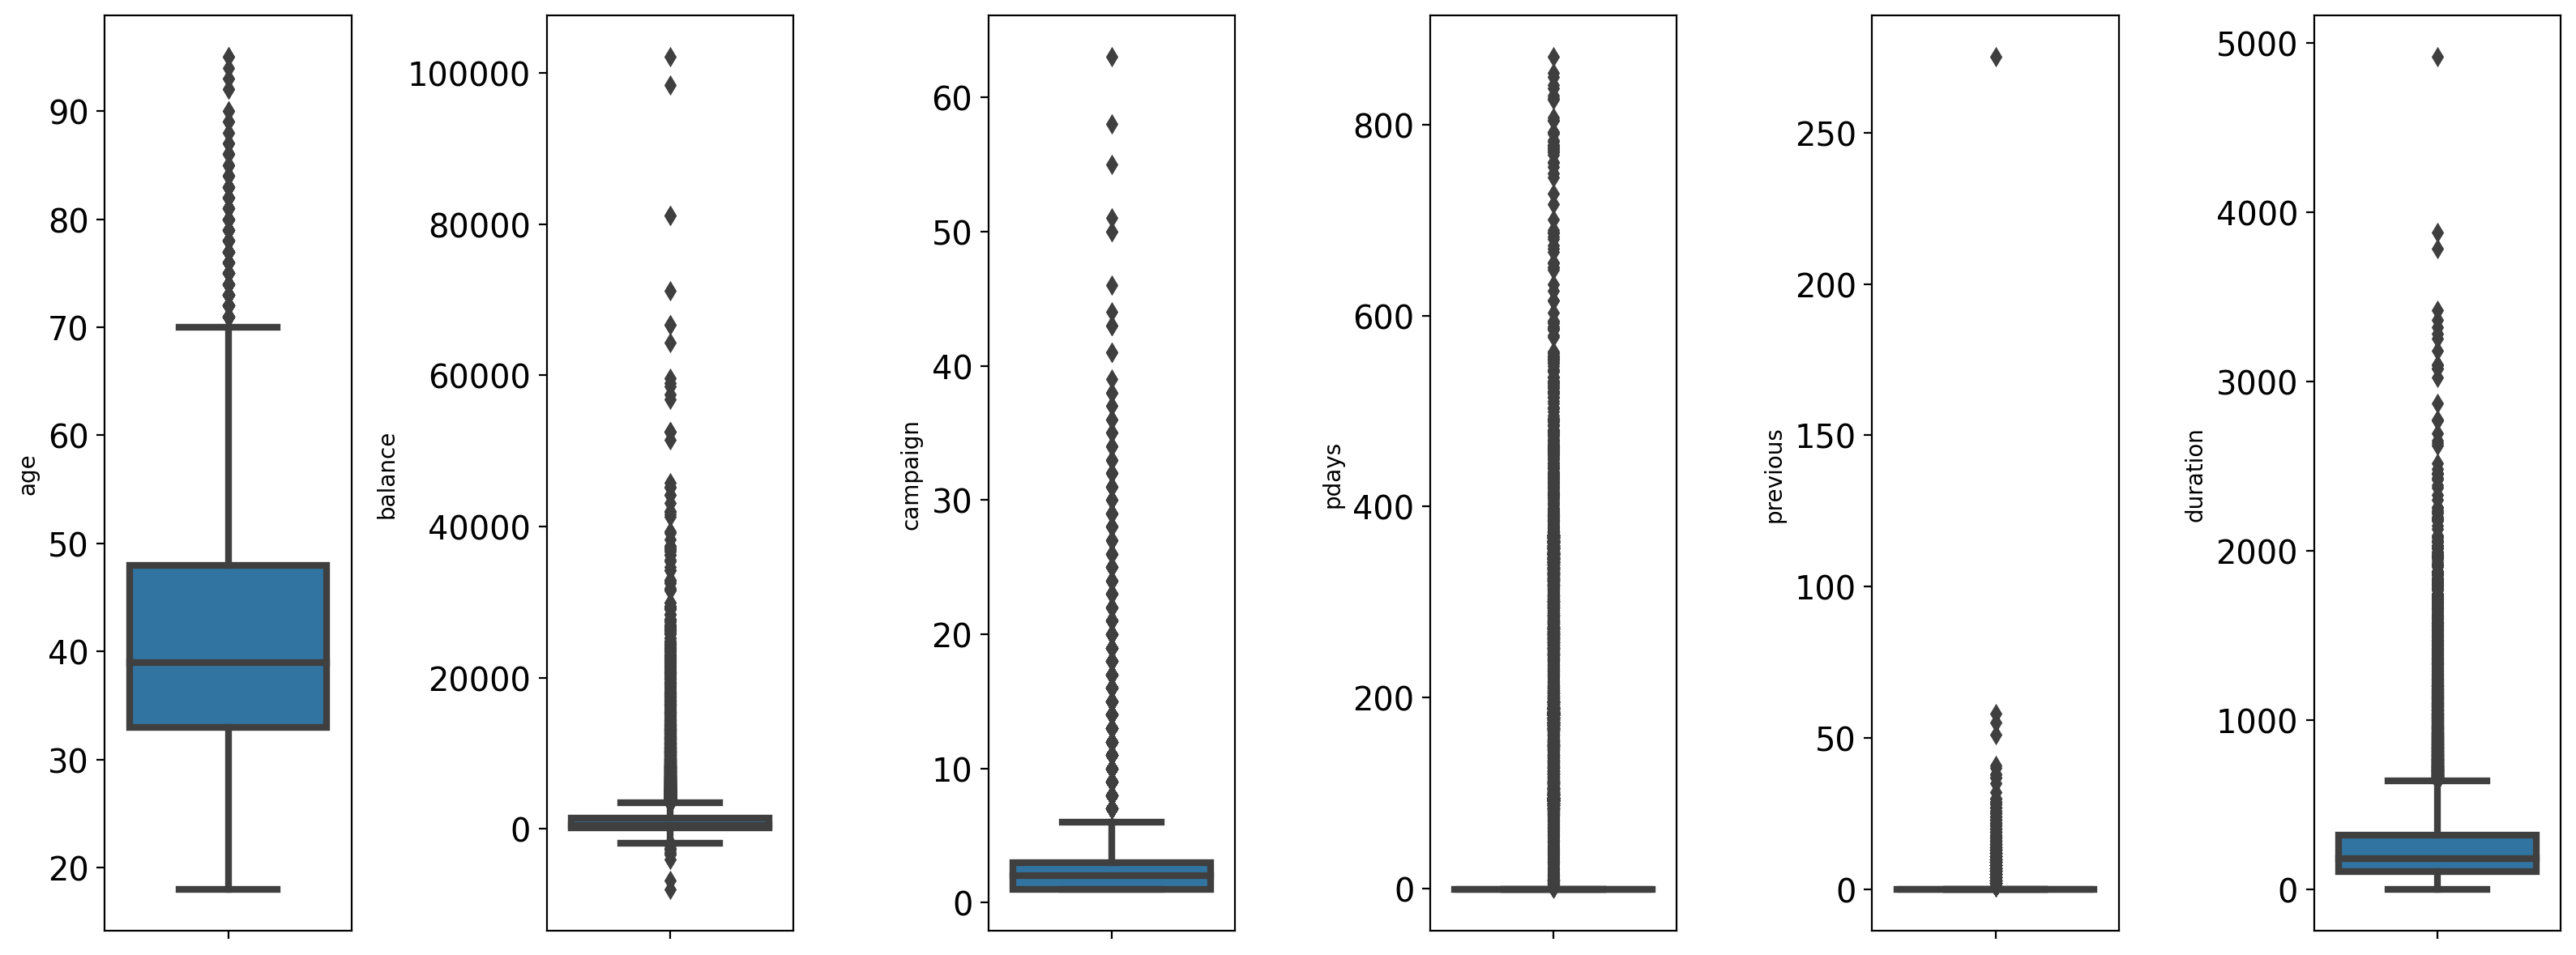

In [34]:
plt.figure(figsize=(16,6),dpi=200)
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

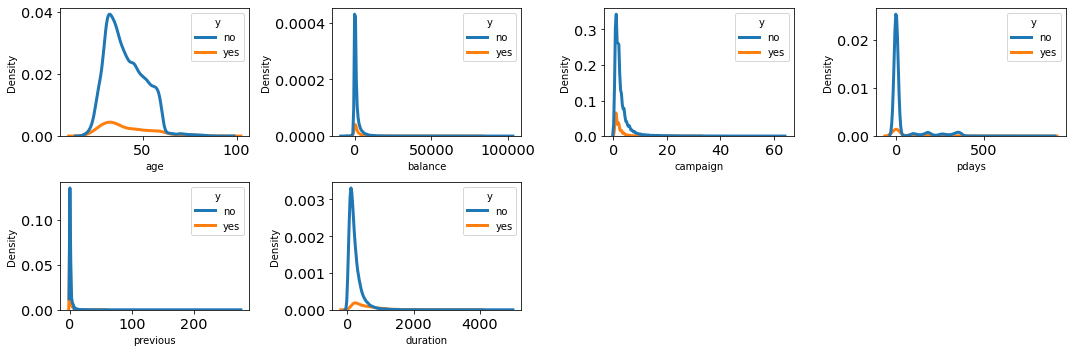

In [35]:
plt.figure(figsize=(15,5))
for i in range(0,len(nums)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(x=df[nums[i]],data=df,hue='y')
    plt.xlabel(nums[i])
    plt.tight_layout()

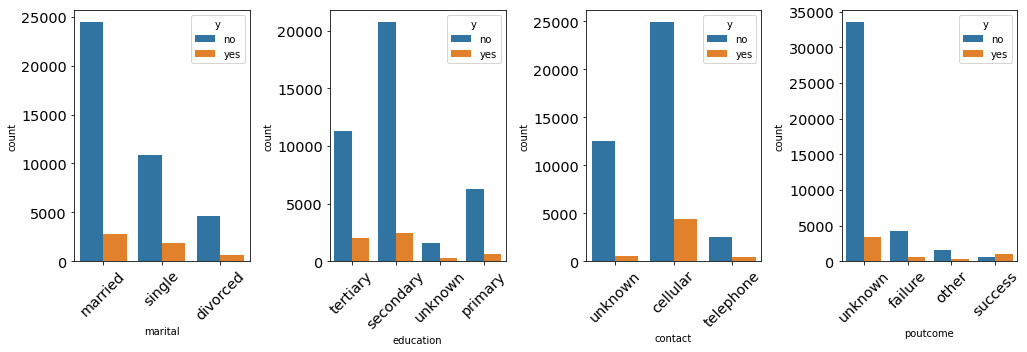

In [36]:
plt.figure(figsize=(17,5))
for i in range(1, len(cats)):
    plt.subplot(1, len(cats), i+1)
    sns.countplot(x=df[cats[i]],data=df, hue='y')
    plt.xticks(rotation=45)
    plt.tight_layout()

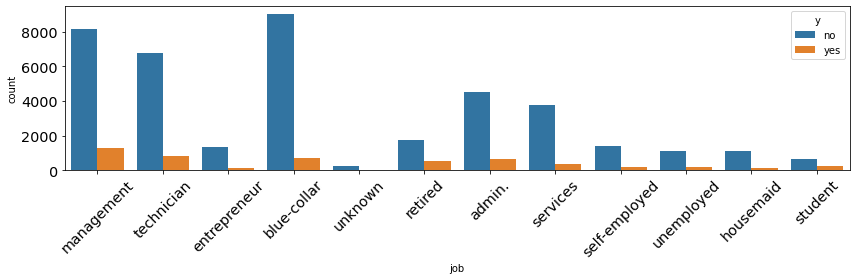

In [37]:
sns.countplot(x='job',data=df, hue='y')
plt.xticks(rotation=45)
plt.tight_layout()

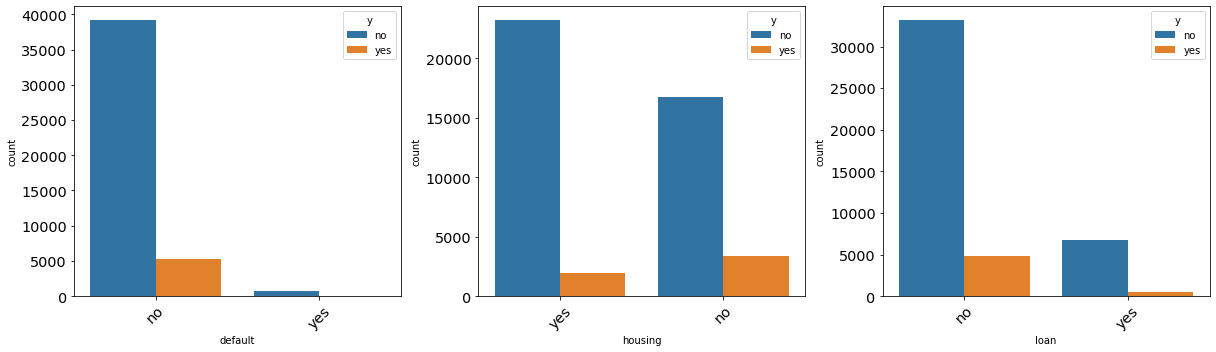

In [38]:
plt.figure(figsize=(17,5))
for i in range(0, len(cats2)):
    plt.subplot(1, len(cats2), i+1)
    sns.countplot(x=df[cats2[i]],data=df, hue='y')
    plt.xticks(rotation=45)
    plt.tight_layout()

#### Insight

Rata-rata dari plot di atas adalah positvie skewed

## Multivariate Analysis

In [13]:
nums = ['age','balance','campaign','pdays','previous','duration']
cats = ['job','marital','education','contact','poutcome']
cats2=['default','housing','loan']
#untuk heatmap
nums2 = ['age','balance','campaign','pdays','previous','duration','target']

<AxesSubplot:>

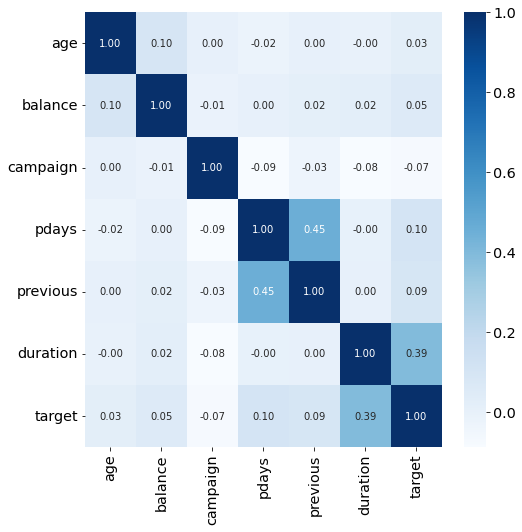

In [8]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[nums2].corr(), cmap='Blues', annot=True, fmt='.2f')

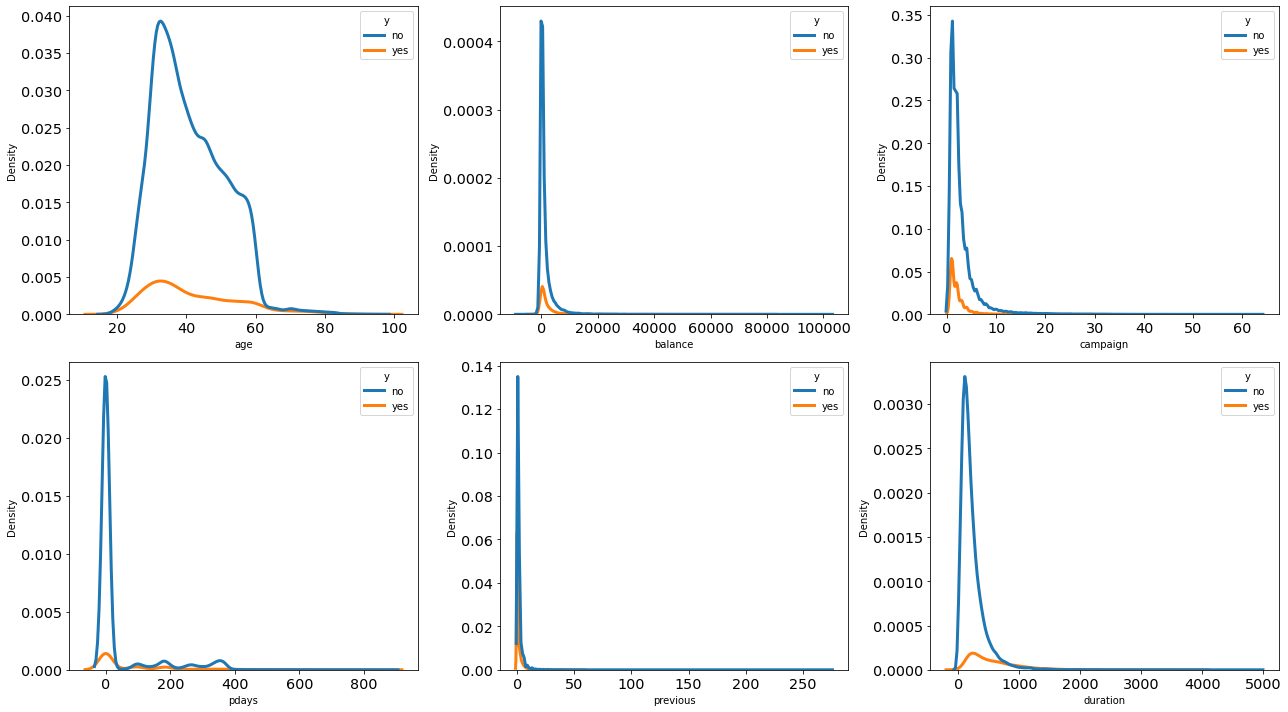

In [11]:
plt.figure(figsize=(18,10))
for i in range(0,len(nums)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[nums[i]],data=df,hue='y')
    plt.xlabel(nums[i])
    plt.tight_layout()
plt.savefig('plot_dist.jpg')

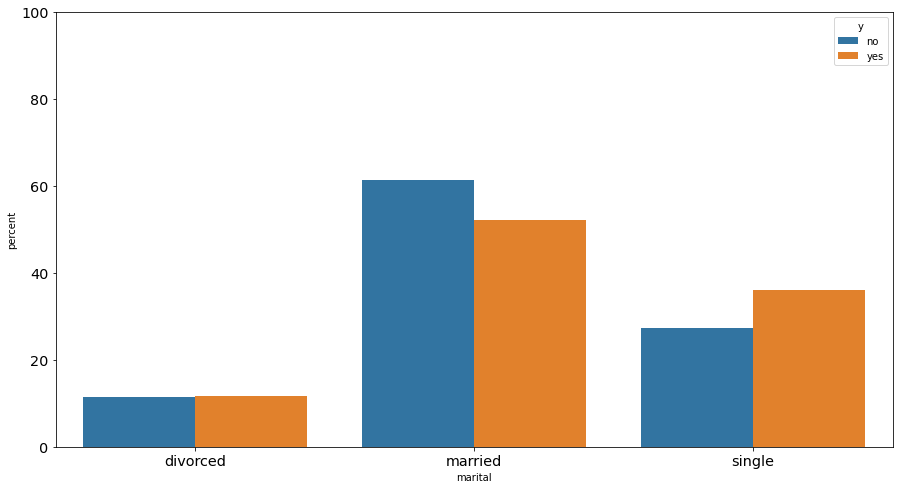

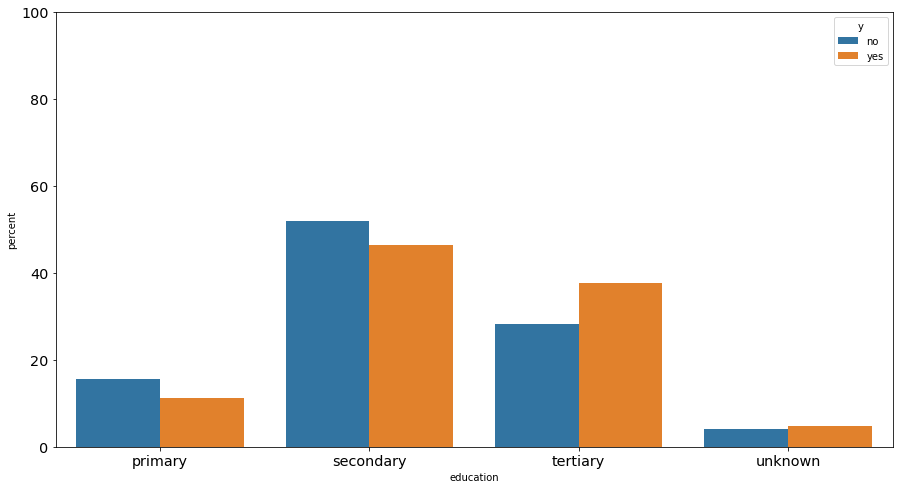

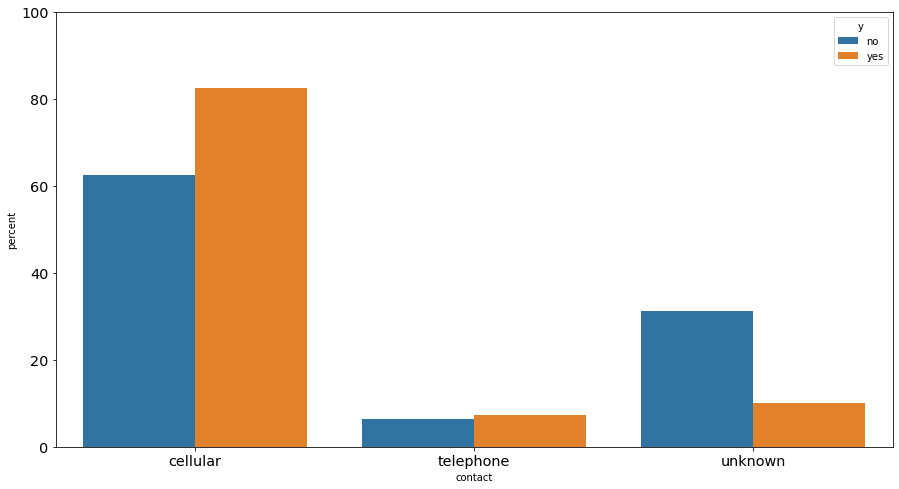

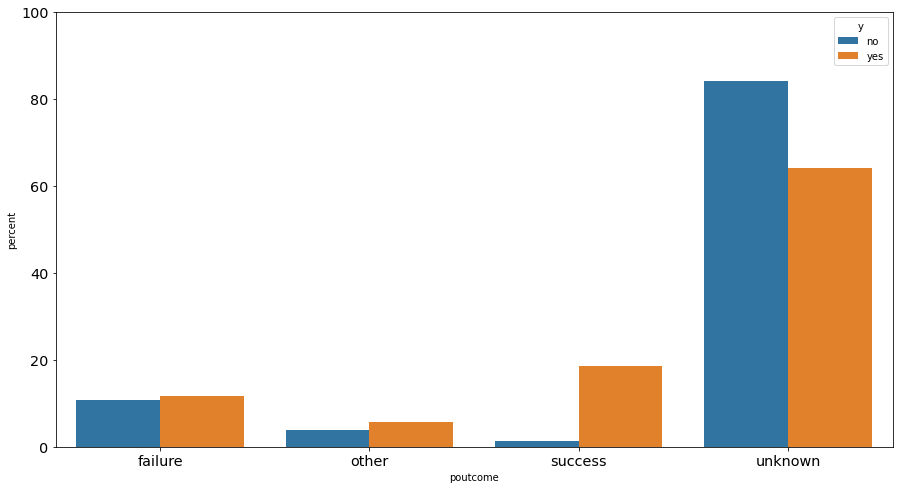

<Figure size 864x288 with 0 Axes>

In [14]:
for i in  range(1, len(cats)):
    plt.figure(figsize=(15,8))
    dfa = df.groupby([cats[i],'y'])['age'].count().reset_index()
    dfa.columns = [cats[i],'y','total']
    dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
    ax = sns.barplot(y='percent',x=cats[i],data = dfa, hue = 'y')
    ax.set(ylim=(0, 100))
    plt.show()
plt.savefig('cats.jpg')

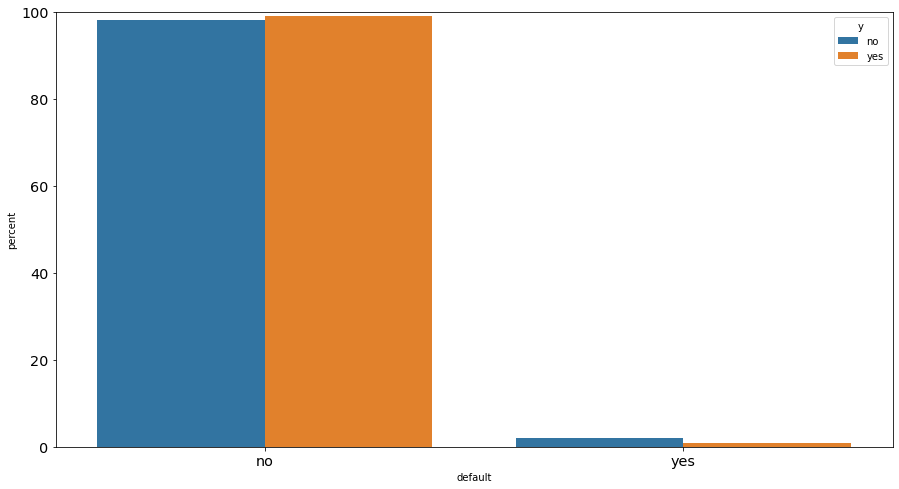

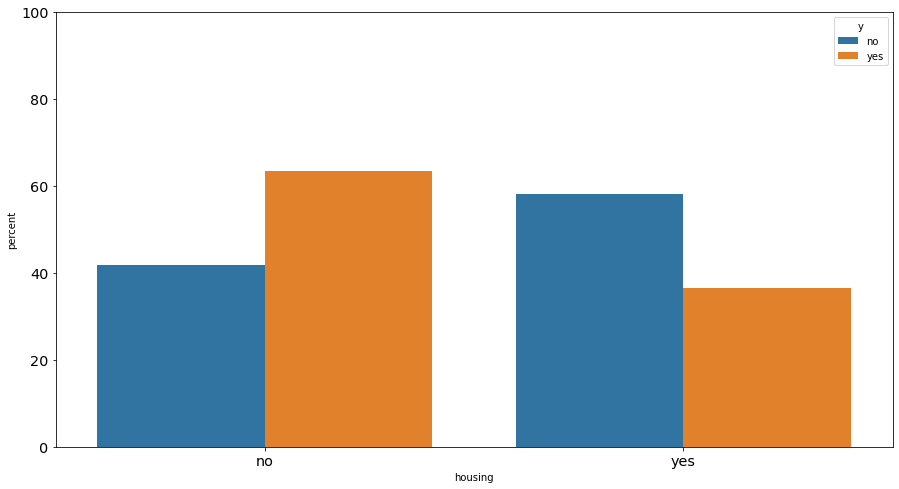

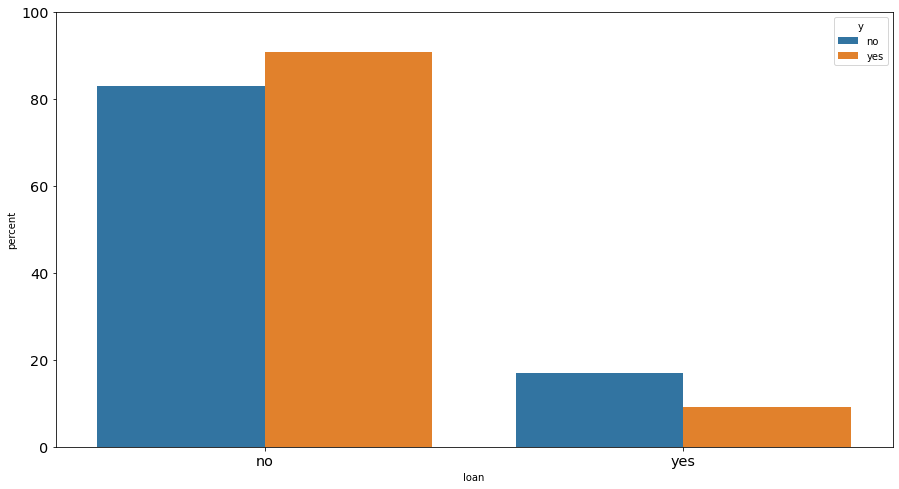

<Figure size 864x288 with 0 Axes>

In [17]:
for i in  range(0, len(cats2)):
    plt.figure(figsize=(15,8))
    dfa = df.groupby([cats2[i],'y'])['age'].count().reset_index()
    dfa.columns = [cats2[i],'y','total']
    dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
    ax = sns.barplot(y='percent',x=cats2[i],data = dfa, hue = 'y')
    ax.set(ylim=(0, 100))
    plt.show()
plt.savefig('cats2.jpg')

# Business Insight

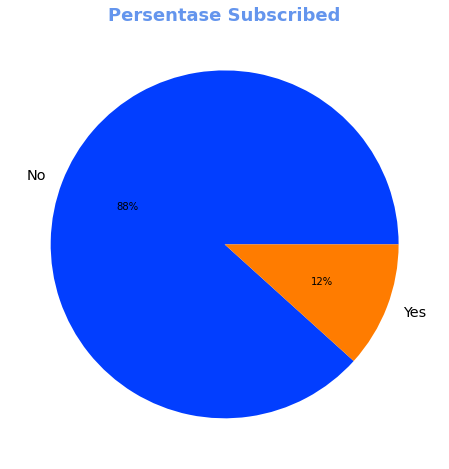

In [42]:
data = [df[df['y']=='no']['y'].count(),df[df['y']=='yes']['y'].count()]
labels = ['No','Yes']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.figure(figsize=(10,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Persentase Subscribed',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.show()

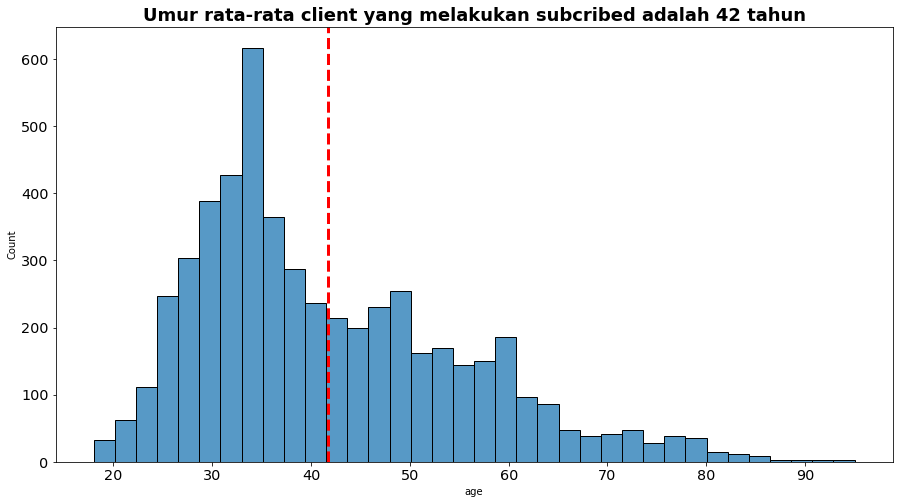

<Figure size 864x288 with 0 Axes>

In [43]:
plt.subplots(figsize=(15,8))
sns.histplot(data=df[df['y']=='yes'][['age','y']], x="age")
plt.axvline(((df[df['y']=='yes'][['age']]).mean().reset_index()[0][0]), linestyle='--', color='red')
plt.title('Umur rata-rata client yang melakukan subcribed adalah 42 tahun', fontsize=18, fontweight='bold')
plt.show()
plt.savefig('bi1.jpg')

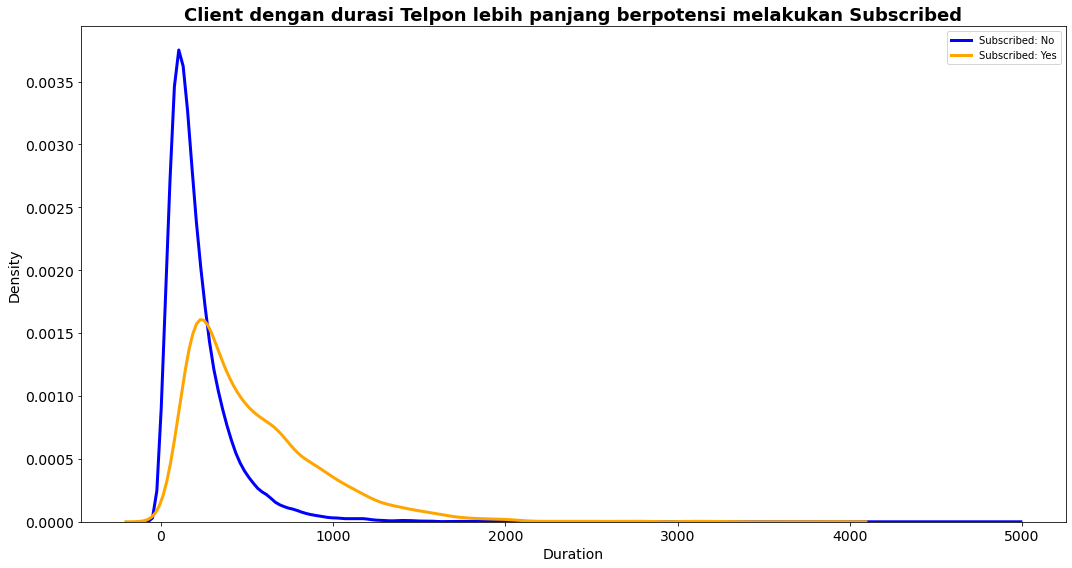

In [44]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(df[df['y']=='no']['duration'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['duration'], color= 'orange', label= 'Subscribed: Yes', ax=ax)

ax.set_title('Client dengan durasi Telpon lebih panjang berpotensi melakukan Subscribed',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Duration', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig('bi2.jpg')

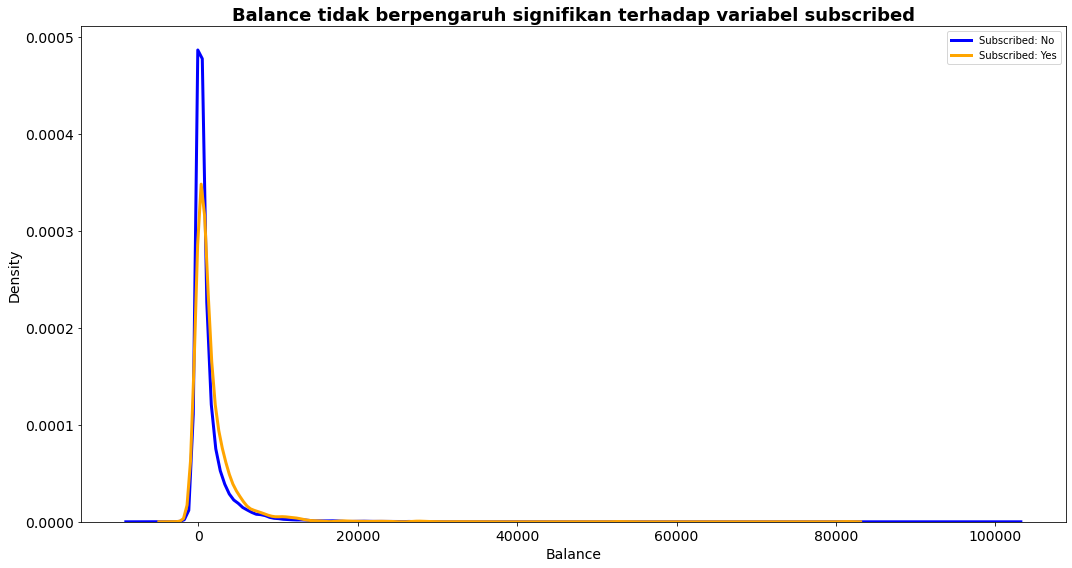

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['balance'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['balance'], color= 'orange', label= 'Subscribed: Yes', ax=ax)
ax.set_title('Balance tidak berpengaruh signifikan terhadap variabel subscribed',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Balance', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig('bi3.jpg')

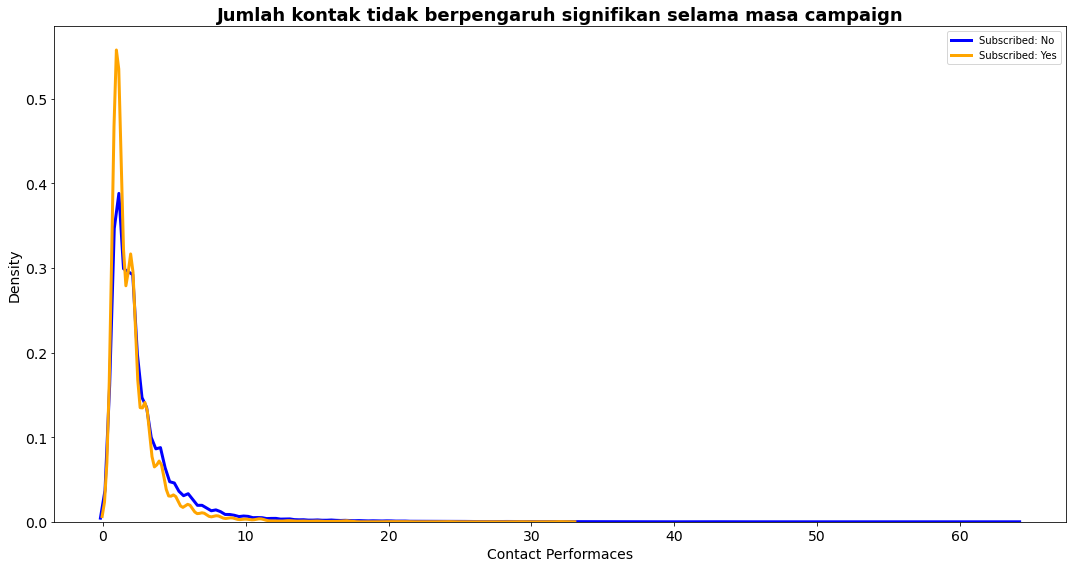

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['campaign'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['campaign'], color= 'orange', label= 'Subscribed: Yes', ax=ax)
ax.set_title('Jumlah kontak tidak berpengaruh signifikan selama masa campaign',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Contact Performaces', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig('bi4.jpg')

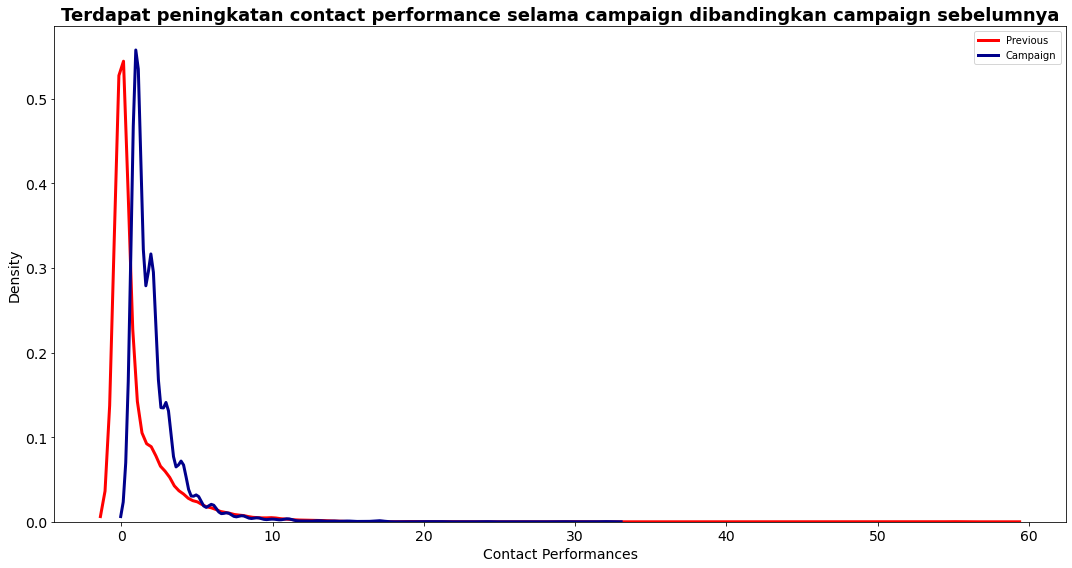

In [47]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='yes']['previous'], color= 'red', label= 'Previous', ax=ax)
sns.kdeplot(df[df['y']=='yes']['campaign'], color= 'darkblue', label= 'Campaign', ax=ax)
ax.set_title('Terdapat peningkatan contact performance selama campaign dibandingkan campaign sebelumnya',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Contact Performances', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig('bi5.jpg')

,loan,y,New_ID_x,New_ID_y,Ratio
0,no,no,33162,37967,87.344273
1,no,yes,4805,37967,12.655727
2,yes,no,6760,7244,93.318609
3,yes,yes,484,7244,6.681391


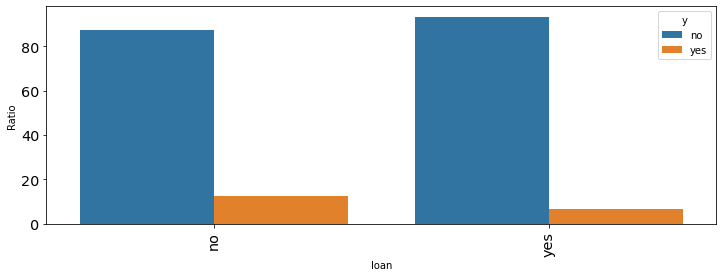

In [50]:
df_dp2=df.groupby(['loan','y'])['New_ID'].nunique().reset_index()
df_dp=df.groupby(['loan'])['New_ID'].nunique().reset_index()
df_union_dp=df_dp2.merge(df_dp,on='loan')
df_union_dp['Ratio']=df_union_dp['New_ID_x']*100/df_union_dp['New_ID_y']
sns.barplot(x="loan", y="Ratio", data=df_union_dp, hue="y")
plt.xticks(rotation=90)
df_union_dp